In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline #used because I am using Jupyter notebook

In [8]:
google_data= pd.read_csv("C:/Users/iliad/Documents/python/project Data Analysis/googleplaystore.csv")

In [9]:
google_data.head()#Inspecting the first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
google_data.shape

(10841, 13)

In [11]:
google_data.describe()#summary statistics

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


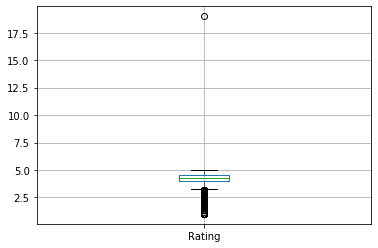

In [12]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E06646C88>]],
      dtype=object)

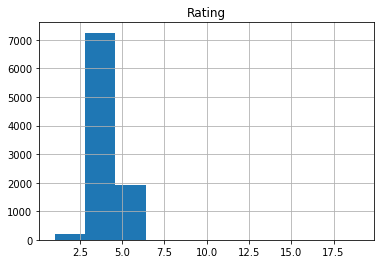

In [13]:
google_data.hist()

In [14]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [16]:
google_data.isnull()#Starting data cleaning

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
#Count the number of missing values in each column
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [18]:
#check for outliers
google_data[google_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
google_data.drop([10472],inplace=True)#remove the outlier

In [20]:
google_data[10470:10475]#confirm it has been removed

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


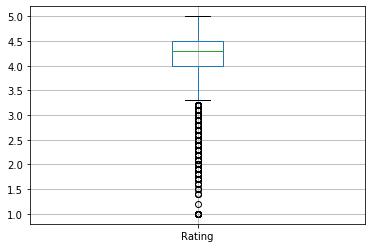

In [21]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E06EED308>]],
      dtype=object)

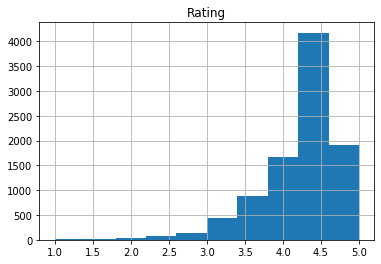

In [22]:
google_data.hist()

In [23]:
#remove columns that are 90%empty
threshold=len(google_data)*0.1 #10% of my rows count (my rows=10840)
threshold

1084.0

In [25]:
google_data.dropna(thresh=threshold,axis=1,inplace=True)#axis=0 is for row 

In [27]:
print(google_data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [28]:
google_data.shape

(10840, 13)

In [33]:
#Data imputation and Manipulation
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())


In [34]:
google_data.Rating=google_data["Rating"].transform(impute_median)

In [35]:
#count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [36]:
#modes of categorical values
print(google_data["Type"].mode())
print(google_data["Current Ver"].mode())
print(google_data["Android Ver"].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [37]:
#Fill the missing categorical values with mode
google_data["Type"].fillna(str(google_data["Type"].mode().values[0]),inplace=True)
google_data["Current Ver"].fillna(str(google_data["Current Ver"].mode().values[0]),inplace=True)
google_data["Android Ver"].fillna(str(google_data["Android Ver"].mode().values[0]),inplace=True)



In [38]:
#count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [41]:
#Convert Price, Reviews and ratings into numericalvalues so I can do the data analysis
google_data["Price"]=google_data["Price"].apply(lambda x :str(x).replace("$"," ")if "$" in str(x) else str(x))
google_data["Price"]=google_data["Price"].apply(lambda x: float(x))
#(coerce)means to ignore if there is any errors when I want the pandas it to appy the numeric function
google_data["Reviews"]=pd.to_numeric(google_data["Reviews"],errors="coerce")

In [54]:
#doing the same to Installs to remove the +`s and the , `s before being able to convert them to float
google_data["Installs"]=google_data["Installs"].apply(lambda x: str(x).replace("+"," ")if "+"  in str(x) else str(x))
google_data["Installs"]=google_data["Installs"].apply(lambda x: str(x).replace(","," ")if "+"  in str(x) else str(x))
google_data["Installs"]=google_data["Installs"].apply(lambda x: float(x))

In [55]:
google_data.head(10)
#to check if everything was effectively done

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [56]:
google_data.describe()#Summary stats after cleaning

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,10840.000000,10840.000000
mean,4.206476,4.441529e+05,72.411070,1.027368
std,0.480342,2.927761e+06,137.229392,15.949703
min,1.000000,0.000000e+00,0.000000,0.000000
25%,4.100000,3.800000e+01,5.000000,0.000000
50%,4.300000,2.094000e+03,10.000000,0.000000
75%,4.500000,5.477550e+04,100.000000,0.000000
max,5.000000,7.815831e+07,500.000000,400.000000


In [60]:
#moving to data visualization
grp=google_data.groupby("Category")
x=grp["Rating"].agg(np.mean)
y=grp["Price"].agg(np.sum)
z=grp["Reviews"].agg(np.mean)
print(x)
print(y)
print(z)

#sending all my apps  to group and then extracting the rating column and giving the mean of the ratings, 
#the same to reviews and for price I extract the sum (how much money the category of this app need)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

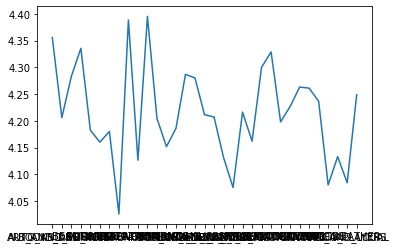

In [61]:
plt.plot(x)

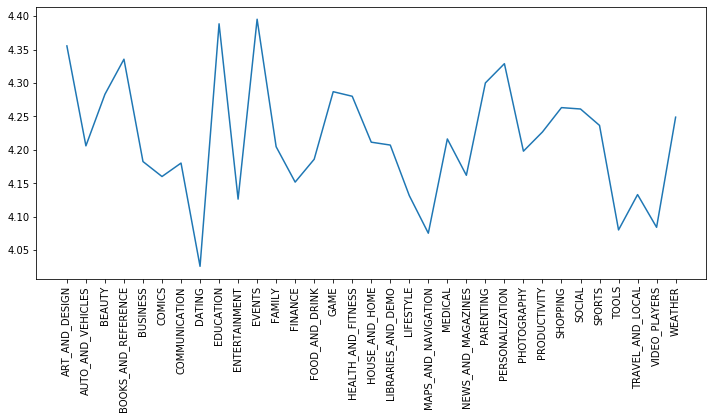

In [72]:
#since it is a little bit messy
plt.figure(figsize=(12,5))
#to make it bigger (length,height)
plt.plot(x)
plt.xticks(rotation=90)#to fix the x 
plt.show()# I don´t want the numbers but the titles 

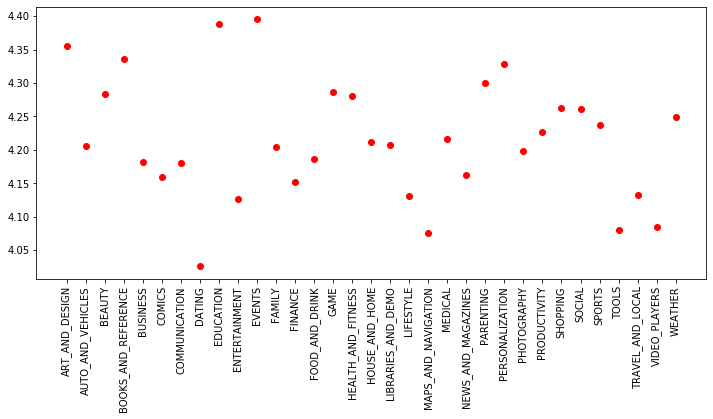

In [74]:
plt.figure(figsize=(12,5))
plt.plot(x,"ro")#to make a dispersion graphic
plt.xticks(rotation=90)
plt.show()

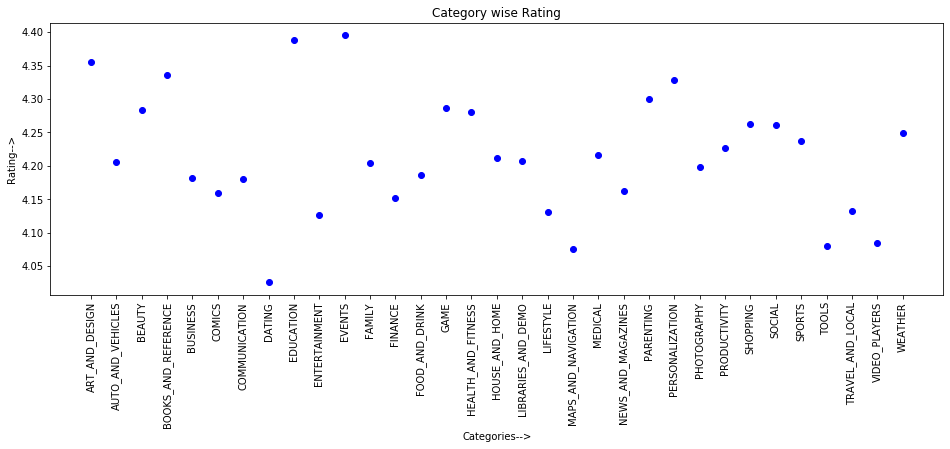

In [76]:
plt.figure(figsize=(16,5))
plt.plot(x,"ro",color="b")#to change the color to blue
plt.xticks(rotation=90)
#Add some titles
plt.title("Category wise Rating")
plt.xlabel("Categories-->")
plt.ylabel("Rating-->")
plt.show()

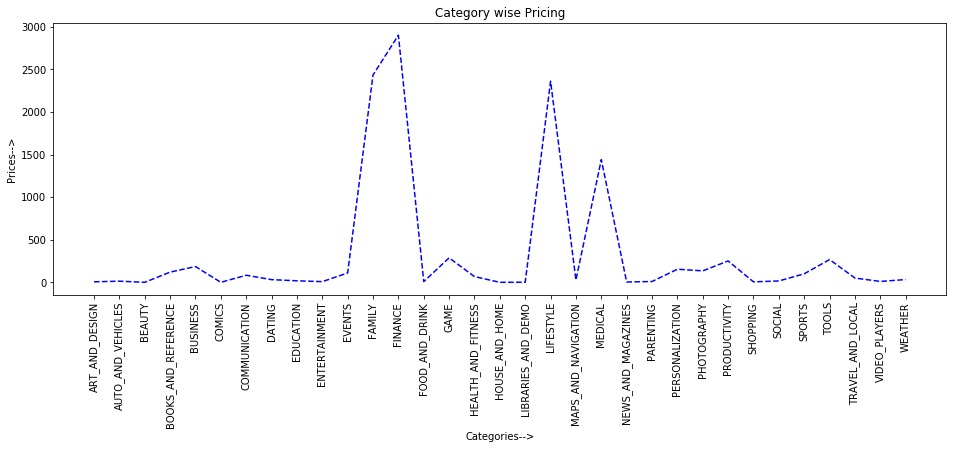

In [77]:
plt.figure(figsize=(16,5))
plt.plot(y,"r--",color="b")#to do a dotted line graphic
plt.xticks(rotation=90)
#Add some titles according to variable y 
plt.title("Category wise Pricing")
plt.xlabel("Categories-->")
plt.ylabel("Prices-->")
plt.show()

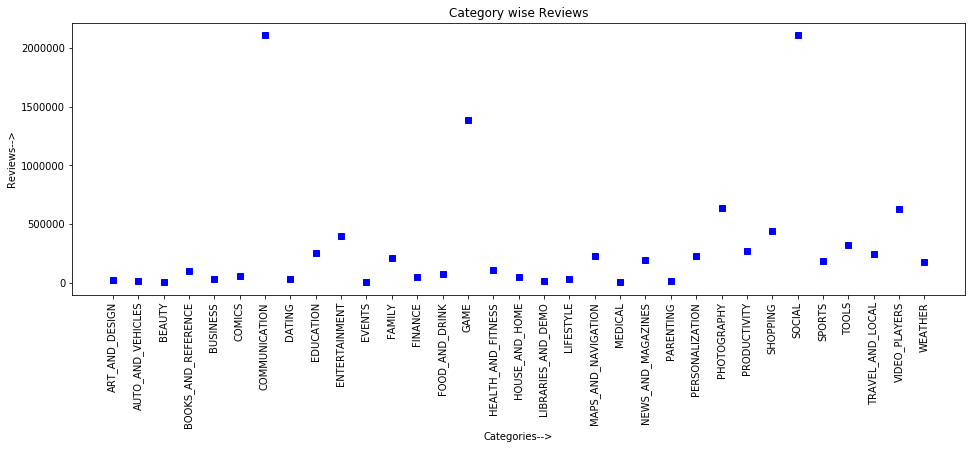

In [80]:
plt.figure(figsize=(16,5))
plt.plot(z,"bs",color="b")
#to do a square dot dispersion graphic(g^ to do a triangle shape)
plt.xticks(rotation=90)
#Add some titles according to variable z 
plt.title("Category wise Reviews")
plt.xlabel("Categories-->")
plt.ylabel("Reviews-->")
plt.show()

In [2]:
#I can see that the highest ratings are in the categories of :events,education and Arts and design (top 3); nonetheless, they don´t have a high amount of reviews.
# What people are mostly buying according to the graphics (see pricing)are finance apps even though its ratings have been low. The other categories in the top 3 are: family and lifestyle apps. Medical apps also stand out among the others placing in a 4th position
#Social, communication and game apps are the ones that receive the most reviews,the amount of reviews are in a much bigger quantity than the others, we could infere that this big number contributes to its rating position which stays in the middle.  

In [1]:
#End